# Introductory tutorial

## tespy overview

- system of equations to describe fluid state in model
- solve for
  - material flows: mass flow, pressure, enthalpy of each connection point
    between two components
  - non-material flows (power,heat): energy flow of each connection point
    between two components
  - component variables: specific components can have variables, e.g.
    compressor RPM, pipe diameter
- equation based solver: specifications can be swapped, no change to model or
  solving procedure required
- offdesign simulation: functions to make relation between actual state and 
  design state of the system
- inject user defined equations into the solver

## topics

- structure of models
- set up a simple model
- make specifications to the model and solve it
- retrieve results from the model
- postprocessings: cycle diagrams and exergy analysis

## structure of models

- Network
- Components
- Connections/PowerConnections/(HeatConnections)
- UserDefinedEquations
- FluidPropertyWrappers

### Network

In [15]:
from tespy.networks import Network


nw = Network()  # sometimes you'll see Network(fluids=[...]), that is long outdated, ChatGPT?
nw

In [16]:
nw.units

Network Units
-------------
Quantity                  | Unit      
--------------------------+-----------
temperature               | kelvin    
temperature_difference    | delta_degC
enthalpy                  | J/kg      
specific_energy           | J/kg      
entropy                   | J/kg/K    
pressure                  | Pa        
mass_flow                 | kg/s      
volumetric_flow           | m3/s      
specific_volume           | m3/kg     
power                     | W         
heat                      | W         
quality                   | 1         
vapor_mass_fraction       | 1         
efficiency                | 1         
ratio                     | 1         
length                    | m         
speed                     | m/s       
area                      | m2        
thermal_conductivity      | W/m/K     
heat_transfer_coefficient | W/K       
not specified             | 1         

In [17]:
nw.units.set_defaults(
    temperature="°C",
    pressure="bar",
    power="kW"
)
nw.units

Network Units
-------------
Quantity                  | Unit      
--------------------------+-----------
temperature               | °C        
temperature_difference    | delta_degC
enthalpy                  | J/kg      
specific_energy           | J/kg      
entropy                   | J/kg/K    
pressure                  | bar       
mass_flow                 | kg/s      
volumetric_flow           | m3/s      
specific_volume           | m3/kg     
power                     | kW        
heat                      | W         
quality                   | 1         
vapor_mass_fraction       | 1         
efficiency                | 1         
ratio                     | 1         
length                    | m         
speed                     | m/s       
area                      | m2        
thermal_conductivity      | W/m/K     
heat_transfer_coefficient | W/K       
not specified             | 1         

## Components and connections

In [18]:
from tespy.components import Turbine, Source, Sink
from tespy.connections import Connection


steam_inflow = Source("steam inflow")
turbine = Turbine("turbine")
waste_steam = Sink("waste steam")

c1 = Connection(steam_inflow, "out1", turbine, "in1", label="c1")
c2 = Connection(turbine, "out1", waste_steam, "in1", label="c2")

nw.add_conns(c1, c2)

In [19]:
c1.set_attr(fluid={"REFPROP::Pentane[0.9]&IPentane[0.1]|mass": 1}, T=175, td_dew=50, m=1)
c2.set_attr(T_dew=30)

In [20]:
turbine.set_attr(eta_s=0.8)

In [21]:
nw.solve("design")


 iter  | residual   | progress   | massflow   | pressure   | enthalpy   | fluid      | component  
-------+------------+------------+------------+------------+------------+------------+------------
 1     | 1.81e+05   | 8 %        | 0.00e+00   | 0.00e+00   | 1.81e+05   | 0.00e+00   | 0.00e+00   
 2     | 2.91e-11   | 100 %      | 0.00e+00   | 0.00e+00   | 2.91e-11   | 0.00e+00   | 0.00e+00   
 3     | 2.91e-11   | 100 %      | 0.00e+00   | 0.00e+00   | 2.91e-11   | 0.00e+00   | 0.00e+00   
 4     | 2.91e-11   | 100 %      | 0.00e+00   | 0.00e+00   | 2.91e-11   | 0.00e+00   | 0.00e+00   
Total iterations: 4, Calculation time: 0.00 s, Iterations per second: 912.80


In [22]:
nw.print_results()


##### RESULTS (Turbine) #####
+---------+-----------+----------+----------+----------+
|         |         P |       pr |       dp |    eta_s |
|---------+-----------+----------+----------+----------|
| turbine | -9.03e+01 | 8.26e-02 | 9.35e+00 | 8.00e-01 |
+---------+-----------+----------+----------+----------+
##### RESULTS (Connection) #####
+----+-----------+-----------+-----------+-----------+-----------+----------------------+
|    |         m |         p |         h |         T |         x | phase                |
|----+-----------+-----------+-----------+-----------+-----------+----------------------|
| c1 | 1.000e+00 | 1.019e+01 | 6.197e+05 | 1.750e+02 | 1.285e+00 | phase not recognized |
| c2 | 1.000e+00 | 8.417e-01 | 5.294e+05 | 1.245e+02 | 1.513e+00 | phase not recognized |
+----+-----------+-----------+-----------+-----------+-----------+----------------------+


In [23]:
nw.results["Connection"]

,m,m_unit,p,p_unit,h,h_unit,T,T_unit,v,v_unit,...,x,x_unit,Td_bp,Td_bp_unit,td_dew,td_dew_unit,td_bubble,td_bubble_unit,Pentane[0.9]&IPentane[0.1]|mass,phase
c1,1.0,kilogram / second,10.194646,bar,619662.315505,joule / kilogram,175.000000,degree_Celsius,0.043874,m3 / second,...,1.285275,dimensionless,50.108472,delta_degree_Celsius,50.000000,delta_degree_Celsius,-50.108472,delta_degree_Celsius,1.0,phase not recognized
c2,1.0,kilogram / second,0.841660,bar,529393.071161,joule / kilogram,124.499011,degree_Celsius,0.536277,m3 / second,...,1.513074,dimensionless,94.708971,delta_degree_Celsius,94.499011,delta_degree_Celsius,-94.708971,delta_degree_Celsius,1.0,phase not recognized


In [24]:
nw.results["Turbine"]

,P,P_unit,pr,pr_unit,dp,dp_unit,eta_s,eta_s_unit
turbine,-90.269244,kilowatt,0.082559,dimensionless,9.352986,bar,0.8,dimensionless


In [25]:
from tespy.components import Generator, PowerSink
from tespy.connections import PowerConnection


generator = Generator("generator")
grid = PowerSink("grid")

e1 = PowerConnection(turbine, "power", generator, "power_in", label="e1")
e2 = PowerConnection(generator, "power_out", grid, "power", label="e2")

nw.add_conns(e1, e2)

In [26]:
generator.set_attr(eta=0.98)

In [27]:
nw.solve("design")


 iter  | residual   | progress   | massflow   | pressure   | enthalpy   | fluid      | component  
-------+------------+------------+------------+------------+------------+------------+------------
 1     | 9.03e+04   | 11 %       | 0.00e+00   | 0.00e+00   | 1.46e-10   | 0.00e+00   | 9.03e+04   
 2     | 4.29e-03   | 92 %       | 0.00e+00   | 0.00e+00   | 1.46e-10   | 0.00e+00   | 4.29e-03   
 3     | 3.00e-10   | 100 %      | 0.00e+00   | 0.00e+00   | 1.46e-10   | 0.00e+00   | 1.16e-10   
 4     | 2.16e-10   | 100 %      | 0.00e+00   | 0.00e+00   | 1.46e-10   | 0.00e+00   | 1.46e-11   
Total iterations: 4, Calculation time: 0.01 s, Iterations per second: 447.21


In [28]:
nw.results["PowerConnection"]

,E,E_unit
e1,90.269244,kilowatt
e2,88.463859,kilowatt


In [29]:
nw.results["Generator"]

,eta,eta_unit,delta_power,delta_power_unit
generator,0.98,dimensionless,1.805385,kilowatt


In [30]:
e2.set_attr(E=100)
c1.set_attr(m=None)
nw.solve("design")


 iter  | residual   | progress   | massflow   | pressure   | enthalpy   | fluid      | component  
-------+------------+------------+------------+------------+------------+------------+------------
 1     | 1.18e+04   | 21 %       | 1.30e-01   | 0.00e+00   | 1.46e-10   | 0.00e+00   | 0.00e+00   
 2     | 6.84e-09   | 100 %      | 7.39e-14   | 0.00e+00   | 1.46e-10   | 0.00e+00   | 0.00e+00   
 3     | 2.16e-10   | 100 %      | 4.90e-17   | 0.00e+00   | 1.46e-10   | 0.00e+00   | 0.00e+00   
 4     | 2.16e-10   | 100 %      | 4.90e-17   | 0.00e+00   | 1.46e-10   | 0.00e+00   | 0.00e+00   
Total iterations: 4, Calculation time: 0.01 s, Iterations per second: 406.95


In [31]:
c1.m.val

1.1304051237831045

In [32]:
c1.m.val_with_unit

<Quantity(1.13040512, 'kilogram / second')>

In [33]:
c2.set_attr(T=100, T_dew=None)
nw.solve("design")
c2.p.val


 iter  | residual   | progress   | massflow   | pressure   | enthalpy   | fluid      | component  
-------+------------+------------+------------+------------+------------+------------+------------
 1     | 2.45e+01   | 51 %       | 6.09e-01   | 1.17e+05   | 4.86e+04   | 0.00e+00   | 0.00e+00   
 2     | 2.53e+05   | 6 %        | 8.06e-01   | 3.49e+04   | 8.28e+04   | 0.00e+00   | 0.00e+00   
 3     | 5.98e+04   | 13 %       | 8.05e-02   | 1.84e+03   | 5.23e+04   | 0.00e+00   | 0.00e+00   
 4     | 4.21e+03   | 26 %       | 3.66e-02   | 8.56e+02   | 1.32e+03   | 0.00e+00   | 0.00e+00   
 5     | 5.68e+01   | 47 %       | 3.52e-04   | 1.85e+01   | 5.34e-01   | 0.00e+00   | 0.00e+00   
 6     | 1.31e-02   | 87 %       | 2.34e-11   | 7.92e-03   | 2.51e-04   | 0.00e+00   | 0.00e+00   
 7     | 3.43e-09   | 100 %      | 8.32e-16   | 2.21e-09   | 1.57e-10   | 0.00e+00   | 0.00e+00   
 8     | 7.28e-10   | 100 %      | 7.69e-16   | 3.71e-10   | 1.25e-10   | 0.00e+00   | 0.00e+00   
Total ite

0.2008017376645629

In [34]:
e1.set_attr(E=104)
generator.set_attr(eta=None)
nw.solve("design")
generator.eta.val


 iter  | residual   | progress   | massflow   | pressure   | enthalpy   | fluid      | component  
-------+------------+------------+------------+------------+------------+------------+------------
 1     | 1.96e+03   | 30 %       | 1.41e-02   | 1.74e-10   | 1.08e-10   | 0.00e+00   | 0.00e+00   
 2     | 5.65e-10   | 100 %      | 3.39e-15   | 1.39e-10   | 1.09e-10   | 0.00e+00   | 0.00e+00   
 3     | 6.70e-10   | 100 %      | 5.66e-16   | 3.36e-10   | 1.24e-10   | 0.00e+00   | 0.00e+00   
 4     | 4.37e-10   | 100 %      | 6.47e-16   | 1.95e-10   | 1.20e-10   | 0.00e+00   | 0.00e+00   
Total iterations: 4, Calculation time: 0.04 s, Iterations per second: 106.90


0.9615384615384616

## offdesign

- Apply equations that take design state as reference
- Various defaults implemented, implement your own by
  - changing lookup table data
  - implement user defined equations for the same purpose
  - implement respective component equations

In [35]:
e1.set_attr(E=None)
generator.set_attr(eta=0.98)

c2.set_attr(T=None, T_dew=20)

nw.solve("design")
nw.save("design.json")


 iter  | residual   | progress   | massflow   | pressure   | enthalpy   | fluid      | component  
-------+------------+------------+------------+------------+------------+------------+------------
 1     | 3.57e+04   | 16 %       | 1.78e-01   | 0.00e+00   | 3.57e+04   | 0.00e+00   | 0.00e+00   
 2     | 6.37e+03   | 24 %       | 6.17e-02   | 0.00e+00   | 0.00e+00   | 0.00e+00   | 0.00e+00   
 3     | 1.06e-09   | 100 %      | 1.03e-14   | 0.00e+00   | 0.00e+00   | 0.00e+00   | 0.00e+00   
 4     | 0.00e+00   | 100 %      | 0.00e+00   | 0.00e+00   | 0.00e+00   | 0.00e+00   | 0.00e+00   
Total iterations: 4, Calculation time: 0.01 s, Iterations per second: 365.06


### offdesign specifications

- automatically unset the specifications in "design"
- automatically set the specifications in "offdesign"
- example:
  - inlet pressure of turbine (combination of td_dew and T) as function of
    cone law instead if explicit specification
  - efficiency of turbine as function of mass flow instead of fixed value
  - note: you have to take the decision, what is design and offdesign!

In [36]:
c1.set_attr(design=["td_dew"])
turbine.set_attr(design=["eta_s"], offdesign=["eta_s_char", "cone"])

nw.solve("offdesign", design_path="design.json")


 iter  | residual   | progress   | massflow   | pressure   | enthalpy   | fluid      | component  
-------+------------+------------+------------+------------+------------+------------+------------
 1     | 3.82e-08   | 100 %      | 1.04e-10   | 3.41e-05   | 1.28e-04   | 0.00e+00   | 0.00e+00   
 2     | 8.25e-08   | 100 %      | 6.38e-13   | 6.03e-07   | 5.30e-08   | 0.00e+00   | 0.00e+00   
 3     | 5.25e-10   | 100 %      | 5.37e-15   | 5.79e-09   | 3.41e-10   | 0.00e+00   | 0.00e+00   
 4     | 4.84e-10   | 100 %      | 5.56e-15   | 4.84e-09   | 2.73e-10   | 0.00e+00   | 0.00e+00   
Total iterations: 4, Calculation time: 0.05 s, Iterations per second: 85.43


In [37]:
import numpy as np


power_range = np.linspace(105, 50)
inlet_pressure_range = []
mass_flow_range = []
turbine_efficiency_range = []

nw.set_attr(iterinfo=False)

for e in power_range:
    e2.set_attr(E=e)
    nw.solve("offdesign", design_path="design.json")
    inlet_pressure_range.append(c1.p.val)
    mass_flow_range.append(c1.m.val)
    turbine_efficiency_range.append(turbine.eta_s.val)

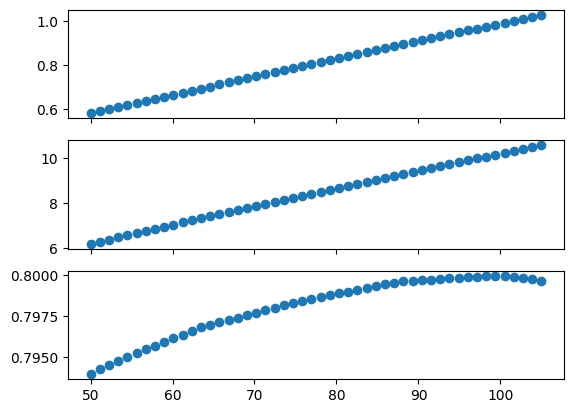

In [38]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(3, sharex=True)

ax[0].scatter(power_range, mass_flow_range)
ax[1].scatter(power_range, inlet_pressure_range)
ax[2].scatter(power_range, turbine_efficiency_range)
